# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [4]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col
df.columns = [col_formatting(col) for col in df.columns]

In [5]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [6]:
# Your code here - Split into train and test
train, test = train_test_split(df)

In [7]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     527.3
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:01:23   Log-Likelihood:                -40637.
No. Observations:                8152   AIC:                         8.146e+04
Df Residuals:                    8057   BIC:                         8.213e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.3685      1.782     35.562      0.000      59.875      66.861
piece_count                                         78.4282      0.901     87.059      0.000      76.662      80.194
num_reviews                                          6.4306      0.692      9.294      0.000       5.074       7.787
play_star_rating                                     4.8324      0.637      7.589      0.000       3.584       6.081
star_rating                                         -1.4419      0.725     -1.988      0.047      -2.864      -0.020
val_star_rating                                     -7.9820      0.642    -12.439      0.000      -9.240      -6.724
ages_10plus                                        118.5542      6.621     17.906      0.000     105.576     131.533
ages_10_14                                         -20.6666      8.568     -2.412      0.016     -37.462      -3.871
ages_10_16                                         -10.4823      4.191     -2.501      0.012     -18.697      -2.268
ages_10_21                                          58.3652      7.466      7.818      0.000      43.730      73.000
ages_11_16                                         -27.4445      5.821     -4.715      0.000     -38.855     -16.034
ages_12plus                                         67.8098      5.456     12.429      0.000      57.115      78.505
ages_12_16                                         -55.6233      6.846     -8.125      0.000     -69.044     -42.203
ages_14plus                                         14.4053      4.061      3.548      0.000       6.445      22.365
ages_16plus                                         29.4672      6.167      4.778      0.000      17.378      41.557
ages_1half_3                                        -8.2206      2.444     -3.364      0.001     -13.011      -3.431
ages_1half_5                                        -3.7607      3.041     -1.237      0.216      -9.721       2.200
ages_2_5                                            16.4029      1.698      9.658      0.000      13.074      19.732
ages_4plus                                         -17.4602      6.248     -2.795      0.005     -29.708      -5.213
ages_4_7                                            -5.6302      3.377     -1.667      0.096     -12.250       0.990
ages_4_99                                           -2.7563      3.576     -0.771      0.441      -9.767       4.254
ages_5plus                                          -7.7211      3.063     -2.521      0.012     -13.725      -1.717
ages_5_12                                          -32.3097      3.130    -10.322      0.000     -38.446     -26.174
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [17]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0] # rename column names to the stats
p_table = p_table.drop(0) # drop first row
p_table = p_table.set_index(p_table.columns[0]) # set index as feature names
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 76
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.3685,1.782,35.562,0.000,59.875,66.861
piece_count,78.4282,0.901,87.059,0.000,76.662,80.194
num_reviews,6.4306,0.692,9.294,0.000,5.074,7.787
play_star_rating,4.8324,0.637,7.589,0.000,3.584,6.081
star_rating,-1.4419,0.725,-1.988,0.047,-2.864,-0.020


In [18]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     660.9
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:10:42   Log-Likelihood:                -40645.
No. Observations:                8152   AIC:                         8.144e+04
Df Residuals:                    8076   BIC:                         8.198e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.5214      1.716     37.026      0.000      60.158      66.884
piece_count                                         78.3481      0.887     88.362      0.000      76.610      80.086
num_reviews                                          6.4074      0.690      9.289      0.000       5.055       7.759
play_star_rating                                     4.9366      0.623      7.924      0.000       3.715       6.158
star_rating                                         -1.3803      0.710     -1.945      0.052      -2.771       0.011
val_star_rating                                     -7.9874      0.611    -13.071      0.000      -9.185      -6.790
ages_10plus                                        123.8164      7.455     16.609      0.000     109.203     138.430
ages_10_14                                         -16.7935      8.925     -1.882      0.060     -34.289       0.702
ages_10_16                                          -7.2986      4.034     -1.809      0.070     -15.205       0.608
ages_10_21                                          63.7213      8.125      7.843      0.000      47.794      79.648
ages_11_16                                         -24.5269      5.685     -4.314      0.000     -35.671     -13.382
ages_12plus                                         72.4565      6.411     11.302      0.000      59.889      85.024
ages_12_16                                         -51.6054      7.244     -7.124      0.000     -65.806     -37.405
ages_14plus                                         18.8418      4.777      3.944      0.000       9.478      28.206
ages_16plus                                         33.8607      6.997      4.840      0.000      20.145      47.576
ages_1half_3                                        -4.3209      4.806     -0.899      0.369     -13.742       5.100
ages_2_5                                            20.1408      4.139      4.866      0.000      12.028      28.254
ages_4plus                                         -15.5699      9.568     -1.627      0.104     -34.326       3.186
ages_5plus                                          -6.6900      3.021     -2.214      0.027     -12.613      -0.767
ages_5_12                                          -27.3829      2.763     -9.912      0.000     -32.798     -21.968
ages_6plus                                         -19.8371      5.924     -3.348      0.001     -31.451      -8.224
ages_6_12                                          -15.4665      1.973     -7.841      0.000     -19.333     -11.600
ages_7_12                                          -14.8409      2.302     -6.446      0.000     -19.354     -10.328
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [19]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

77 60
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.5214,1.716,37.026,0.000,60.158,66.884
piece_count,78.3481,0.887,88.362,0.000,76.610,80.086
num_reviews,6.4074,0.690,9.289,0.000,5.055,7.759
play_star_rating,4.9366,0.623,7.924,0.000,3.715,6.158
star_rating,-1.3803,0.710,-1.945,0.052,-2.771,0.011


In [20]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     837.9
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:11:47   Log-Likelihood:                -40662.
No. Observations:                8152   AIC:                         8.144e+04
Df Residuals:                    8092   BIC:                         8.186e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.0202      1.285     50.597      0.000      62.501      67.539
piece_count                                         78.0777      0.865     90.258      0.000      76.382      79.773
num_reviews                                          6.1786      0.641      9.634      0.000       4.921       7.436
play_star_rating                                     4.4915      0.529      8.483      0.000       3.454       5.529
val_star_rating                                     -8.8972      0.497    -17.895      0.000      -9.872      -7.923
ages_10plus                                        125.1151      7.386     16.940      0.000     110.637     139.593
ages_10_21                                          64.5145      8.095      7.969      0.000      48.645      80.384
ages_11_16                                         -22.7743      5.524     -4.123      0.000     -33.602     -11.947
ages_12plus                                         75.3040      6.276     11.999      0.000      63.002      87.606
ages_12_16                                         -46.9641      7.008     -6.701      0.000     -60.702     -33.226
ages_14plus                                         23.0957      4.448      5.192      0.000      14.376      31.816
ages_16plus                                         38.1361      6.678      5.711      0.000      25.046      51.227
ages_2_5                                            24.0192      1.869     12.848      0.000      20.354      27.684
ages_5plus                                          -6.7584      2.988     -2.262      0.024     -12.615      -0.901
ages_5_12                                          -25.9779      2.606     -9.970      0.000     -31.085     -20.870
ages_6plus                                         -19.1947      5.857     -3.277      0.001     -30.676      -7.713
ages_6_12                                          -13.8721      1.713     -8.098      0.000     -17.230     -10.514
ages_7_12                                          -13.5078      2.088     -6.469      0.000     -17.601      -9.415
ages_7_14                                           -9.0595      1.801     -5.030      0.000     -12.590      -5.529
ages_8plus                                          19.7254      4.931      4.000      0.000      10.059      29.391
ages_8_12                                          -13.7884      2.668     -5.168      0.000     -19.019      -8.558
ages_8_14                                           -9.0051      1.871     -4.812      0.000     -12.673      -5.337
ages_9plus                                         108.0940     11.256      9.603      0.000      86.028     130.160
ages_9_12                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [21]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.469527055680552),
 ('num_reviews', 2.6066420012233507),
 ('play_star_rating', 1.7931378308397423),
 ('val_star_rating', 1.6118765866517124),
 ('ages_10plus', 17.70226747562386),
 ('ages_10_21', 7.15748949129217),
 ('ages_11_16', 1.142573495677674),
 ('ages_12plus', 7.127843202808447),
 ('ages_12_16', 1.1540839228902875),
 ('ages_14plus', 2.0990568520295496),
 ('ages_16plus', 9.178046646721832),
 ('ages_2_5', 1.1817522243030547),
 ('ages_5plus', inf),
 ('ages_5_12', 3.1549950944256193),
 ('ages_6plus', 2.657726213097786),
 ('ages_6_12', 1.7905266816606953),
 ('ages_7_12', 1.4416083253541123),
 ('ages_7_14', 1.72282094342947),
 ('ages_8plus', 3.32866082566297),
 ('ages_8_12', 1.249951802888974),
 ('ages_8_14', 1.7637175344220235),
 ('ages_9plus', 1.5475757674282964),
 ('ages_9_12', 1.017832027536626),
 ('ages_9_14', 1.7631278314702228),
 ('theme_name_Architecture', 5.883898826180169),
 ('theme_name_BOOST', 1.0590875233137595),
 ('theme_name_Blues_Helicopter_Pursuit', 1

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [22]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

60 51


In [23]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     868.7
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:16:52   Log-Likelihood:                -41046.
No. Observations:                8152   AIC:                         8.220e+04
Df Residuals:                    8100   BIC:                         8.256e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           70.1185      1.062     66.023      0.000      68.037      72.200
piece_count                                         80.0449      0.684    117.055      0.000      78.704      81.385
num_reviews                                          4.3499      0.630      6.900      0.000       3.114       5.586
play_star_rating                                     6.2589      0.499     12.550      0.000       5.281       7.237
val_star_rating                                    -10.8793      0.496    -21.944      0.000     -11.851      -9.907
ages_11_16                                         -34.1530      5.483     -6.229      0.000     -44.901     -23.405
ages_12_16                                         -58.3525      6.980     -8.359      0.000     -72.036     -44.669
ages_14plus                                          2.2685      3.876      0.585      0.558      -5.330       9.867
ages_2_5                                            19.2409      1.818     10.585      0.000      15.678      22.804
ages_5_12                                          -31.8843      2.634    -12.105      0.000     -37.048     -26.721
ages_6plus                                         -25.7793      6.091     -4.232      0.000     -37.719     -13.839
ages_6_12                                          -20.9924      1.628    -12.897      0.000     -24.183     -17.802
ages_7_12                                          -19.7821      2.058     -9.612      0.000     -23.816     -15.748
ages_7_14                                          -15.5298      1.743     -8.909      0.000     -18.947     -12.113
ages_8plus                                           0.0694      4.488      0.015      0.988      -8.728       8.867
ages_8_12                                          -20.0646      2.644     -7.589      0.000     -25.248     -14.882
ages_8_14                                          -16.8041      1.790     -9.387      0.000     -20.313     -13.295
ages_9plus                                          21.5622     10.690      2.017      0.044       0.607      42.517
ages_9_12                                          -31.7114      7.030     -4.511      0.000     -45.491     -17.932
ages_9_14                                          -14.1792      2.563     -5.532      0.000     -19.204      -9.155
theme_name_BOOST                                    86.7604      9.610      9.028      0.000      67.921     105.599
theme_name_Blues_Helicopter_Pursuit                 22.8503      9.000      2.539      0.011       5.208      40.493
theme_name_Carnotaurus_Gyrosphere_Escape            45.1865     10.946      4.128      0.000      23.729      66.644
theme_name_City                          

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

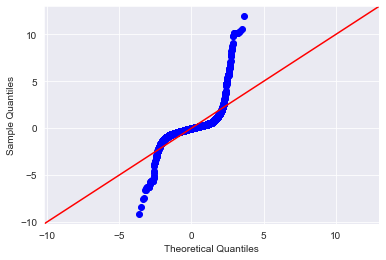

In [24]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

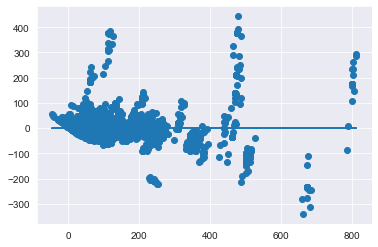

In [25]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])


> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [26]:
# Your code here - Check for outliers
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [27]:
# Remove extreme outliers
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     464.0
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:26:36   Log-Likelihood:                -5114.6
No. Observations:                8067   AIC:                         1.033e+04
Df Residuals:                    8015   BIC:                         1.070e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4259      0.013    256.392      0.000       3.400       3.452
piece_count                                          0.5942      0.010     58.928      0.000       0.574       0.614
num_reviews                                         -0.0066      0.008     -0.820      0.412      -0.022       0.009
play_star_rating                                     0.1054      0.006     17.098      0.000       0.093       0.117
val_star_rating                                     -0.1601      0.006    -25.893      0.000      -0.172      -0.148
ages_11_16                                           0.2636      0.066      4.009      0.000       0.135       0.393
ages_12_16                                          -0.0201      0.086     -0.233      0.816      -0.189       0.149
ages_14plus                                          0.3726      0.054      6.949      0.000       0.267       0.478
ages_2_5                                             0.4358      0.022     19.777      0.000       0.393       0.479
ages_5_12                                           -0.7174      0.033    -21.761      0.000      -0.782      -0.653
ages_6plus                                          -0.9518      0.075    -12.678      0.000      -1.099      -0.805
ages_6_12                                           -0.1560      0.020     -7.772      0.000      -0.195      -0.117
ages_7_12                                            0.1143      0.025      4.531      0.000       0.065       0.164
ages_7_14                                            0.0103      0.021      0.485      0.627      -0.031       0.052
ages_8plus                                           0.5760      0.057     10.160      0.000       0.465       0.687
ages_8_12                                            0.2472      0.033      7.594      0.000       0.183       0.311
ages_8_14                                            0.3381      0.022     15.226      0.000       0.295       0.382
ages_9plus                                           0.1879      0.128      1.473      0.141      -0.062       0.438
ages_9_12                                            0.3468      0.081      4.277      0.000       0.188       0.506
ages_9_14                                            0.4890      0.031     15.593      0.000       0.428       0.550
theme_name_BOOST                                     0.9813      0.126      7.808      0.000       0.735       1.228
theme_name_Blues_Helicopter_Pursuit                  0.6528      0.110      5.915      0.000       0.436       0.869
theme_name_Carnotaurus_Gyrosphere_Escape             1.0341      0.129      8.007      0.000       0.781       1.287
theme_name_City                          

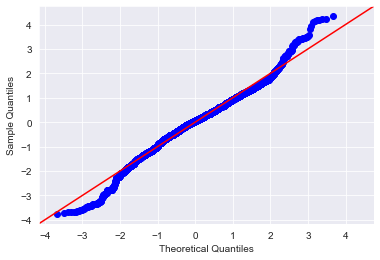

In [28]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


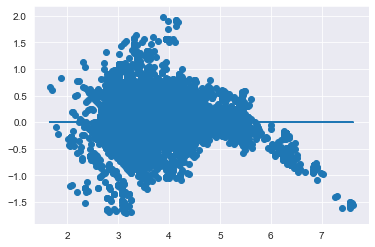

In [29]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


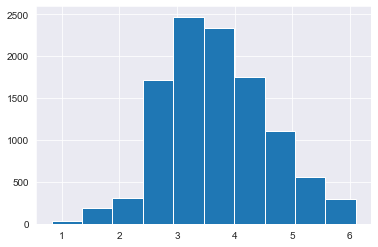

In [30]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [31]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     468.6
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:28:07   Log-Likelihood:                -4847.8
No. Observations:                8027   AIC:                             9800.
Df Residuals:                    7975   BIC:                         1.016e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4651      0.013    263.172      0.000       3.439       3.491
piece_count                                          0.6602      0.011     59.051      0.000       0.638       0.682
num_reviews                                         -0.0185      0.008     -2.338      0.019      -0.034      -0.003
play_star_rating                                     0.1062      0.006     17.886      0.000       0.095       0.118
val_star_rating                                     -0.1511      0.006    -25.236      0.000      -0.163      -0.139
ages_11_16                                           0.1496      0.069      2.180      0.029       0.015       0.284
ages_12_16                                          -0.1434      0.087     -1.641      0.101      -0.315       0.028
ages_14plus                                          0.3268      0.054      6.009      0.000       0.220       0.433
ages_2_5                                             0.4692      0.022     21.330      0.000       0.426       0.512
ages_5_12                                           -0.7418      0.032    -22.967      0.000      -0.805      -0.679
ages_6plus                                          -0.9852      0.072    -13.660      0.000      -1.127      -0.844
ages_6_12                                           -0.1823      0.019     -9.440      0.000      -0.220      -0.144
ages_7_12                                            0.0870      0.025      3.551      0.000       0.039       0.135
ages_7_14                                           -0.0004      0.021     -0.022      0.983      -0.041       0.040
ages_8plus                                           0.5514      0.053     10.401      0.000       0.448       0.655
ages_8_12                                            0.2173      0.031      6.912      0.000       0.156       0.279
ages_8_14                                            0.3304      0.022     15.224      0.000       0.288       0.373
ages_9plus                                           0.1830      0.124      1.481      0.139      -0.059       0.425
ages_9_12                                            0.3154      0.081      3.887      0.000       0.156       0.474
ages_9_14                                            0.4706      0.031     15.020      0.000       0.409       0.532
theme_name_BOOST                                     1.0037      0.122      8.226      0.000       0.765       1.243
theme_name_Blues_Helicopter_Pursuit                  0.6432      0.113      5.677      0.000       0.421       0.865
theme_name_Carnotaurus_Gyrosphere_Escape             1.0099      0.117      8.634      0.000       0.781       1.239
theme_name_City                          

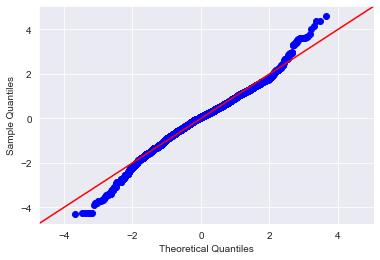

In [32]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

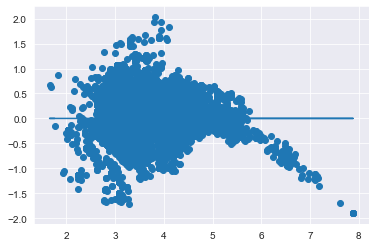

In [33]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [34]:
x_cols = ['piece_count', 'country_US']
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     4441.
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:42:41   Log-Likelihood:                -7417.9
No. Observations:                8027   AIC:                         1.484e+04
Df Residuals:                    8024   BIC:                         1.486e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7345      0.007    528.355      0.000       3.721       3.748
piece_count     0.7955      0.009     93.469      0.000       0.779       0.812
country_US     -0.2827      0.027    -10.341      0.000      -0.336      -0.229
==============================================================================
Omnibus:                      479.784   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.725
Skew:                          -0.522   Prob(JB):                    8.42e-152
Kurtosis:                       3.995   Cond. No.                         4.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 